<h2><b>Table of Contents</b></h2>

1. [**Introduction**](#Introduction)
2. [**Data Description**](#Data-Description)
3. [**Missing Data Analysis**](#Missing-Data-Analysis)
4. [**Exploratory Visualizations**](#Exploratory-Visualizations)
5. [**Results & Insights**](#Results--Insights)
6. [**Conclusion**](#Conclusion)

## Introduction

The goal of this project ist o analyze the Home Credit Default Risk dataset in order to predict weather a client with repay a loan. The reason for this project is to help people get financial support, especially those who might be unfairly denied due to not having credit.

Home Credit Group uses many different data categories, like age, income, and occupation to better predict who can  repay their loans. In this notebook we will examine, analyze, and come up with insight from the data given.


## Data Description

The dataset includes 10 CSV files related to loan applications and credit history from Home Credit. Each file provides different aspects of a client's financial background:

<b>application_{train|test}.csv</b> – Contains loan application details. The training set includes an outcome variable, while the test set does not. Each row represents a loan.

<b>bureau.csv</b> – Records of past loans from external financial institutions linked to applicants. Multiple entries may exist per client.

<b>bureau_balance.csv</b> – Tracks monthly updates for the records in the bureau file, showing how past loans evolved over time.

<b>POS_CASH_balance.csv</b> – Contains historical monthly summaries for previous point-of-sale and cash loans from Home Credit.

<b>credit_card_balance.csv</b> – Stores past monthly statements for credit cards issued by Home Credit.

<b>previous_application.csv</b> – Lists earlier loan applications made by clients, whether approved or not.

<b>installments_payments.csv</b> – Logs repayments for past loans, including both completed and missed payments.

<b>HomeCredit_columns_description.csv</b> – Provides details about the fields in the dataset.

<b>sample_submission.csv</b> – A template for submitting predictions. It includes the ID and the TARGET column (the predicted default status).

In [1]:
# Loading libraries &  csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

application_train = pd.read_csv('application_train.csv')
application_test =  pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
POS_CASH_balance =  pd.read_csv('POS_CASH_balance.csv')
credit_casrd_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

In [2]:
# Review the data types for each column and the amount of rows

application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [3]:
# Reviewing the first few row of the training data

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing Data Analysis

Below we will find the missing data (values that are null) in the application train dataframe that we will use to create our predictive model

In [4]:
#  Find all the missing values in each column

missing_data = application_train.isnull().sum().sort_values(ascending=False)
percentage_missing_data = (missing_data / len(application_train))* 100

missing_data = pd.DataFrame({'Missing values':  missing_data, 'Percentage': percentage_missing_data})

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
missing_data

,Missing values,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [5]:
# For missing values 1% or less we will use the mean  to fill in missing values

low_missing_col = ["DAYS_LAST_PHONE_CHANGE","CNT_FAM_MEMBERS",'AMT_ANNUITY', "AMT_GOODS_PRICE", "EXT_SOURCE_2",
                "DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
                   "OBS_60_CNT_SOCIAL_CIRCLE", "NAME_TYPE_SUITE"]

for col in low_missing_col:
    application_train[col].fillna(application_train[col].mean()
        if application_train[col].dtype == "float64" else "Other", inplace = True)

In [6]:
# Check that those columns no longer have missing data

missing_data_after = application_train[low_missing_col].isnull().sum()
print(missing_data_after)

DAYS_LAST_PHONE_CHANGE      0
CNT_FAM_MEMBERS             0
AMT_ANNUITY                 0
AMT_GOODS_PRICE             0
EXT_SOURCE_2                0
DEF_30_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
NAME_TYPE_SUITE             0
dtype: int64


In [7]:
# For missing values  1%-32%

med_missing_col =["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK"
                 ,"AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","EXT_SOURCE_3","OCCUPATION_TYPE"]

for col in med_missing_col:
    application_train[col].fillna(application_train[col].median()
        if application_train[col].dtype == "float64" else "Other", inplace = True)

In [8]:
# Check that those columns no longer have missing data

missing_data_after = application_train[med_missing_col].isnull().sum()
print(missing_data_after)

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
EXT_SOURCE_3                  0
OCCUPATION_TYPE               0
dtype: int64


In [9]:
# Dropping columns with missing values of more than 40%

columns_to_drop = missing_data[missing_data['Percentage'] > 40].index
application_train  = application_train.drop(columns  = columns_to_drop)

In [10]:
# Check that those columns no longer have missing data

missing_data_after = application_train.isnull().sum()
print(missing_data_after)

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64


## Exploratory Visualizations

First we will want to see the distribution of targert variable to understand if there is a possibility of the model learning a bias based on imbalanced distribution. We will also want to see the correlation between the different categories track and defaulting vs. non-defaulting.Then we will look at the correlations between different categories and the target variable.

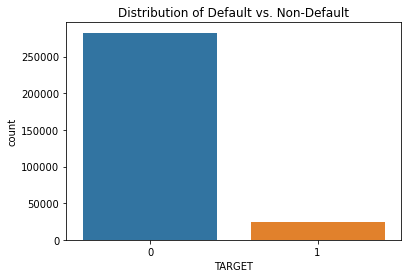

In [11]:
# Finding the distribution of the target variable

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=application_train)
plt.title('Distribution of Default vs. Non-Default')
plt.show()

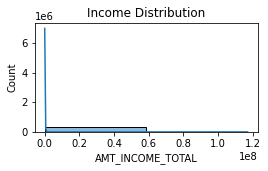

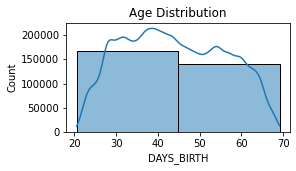

In [12]:
# Finding the distribution for Income and Age

plt.figure(figsize=(4,2))
sns.histplot(application_train['AMT_INCOME_TOTAL'], kde=True, bins=2)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(4,2))
sns.histplot(application_train['DAYS_BIRTH']/-365, kde=True, bins=2)
plt.title('Age Distribution')
plt.show()

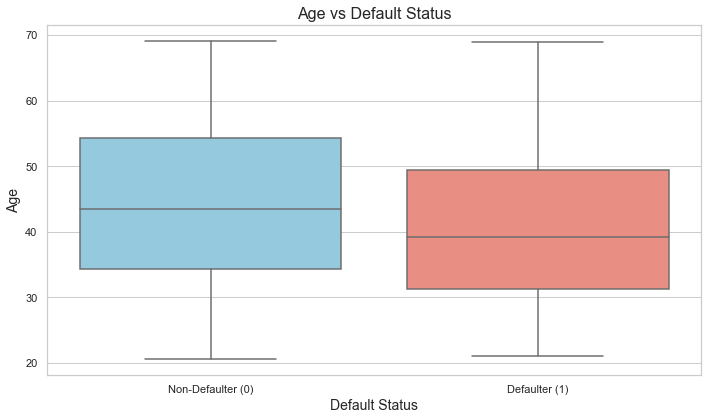

In [13]:
sns.set(style="whitegrid")

application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH']/-365

# Boxplot for Age vs Default Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=application_train, palette=["skyblue", "salmon"])
plt.title('Age vs Default Status', fontsize=16)
plt.xlabel('Default Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([0, 1], ['Non-Defaulter (0)', 'Defaulter (1)'])
plt.tight_layout()
plt.show()

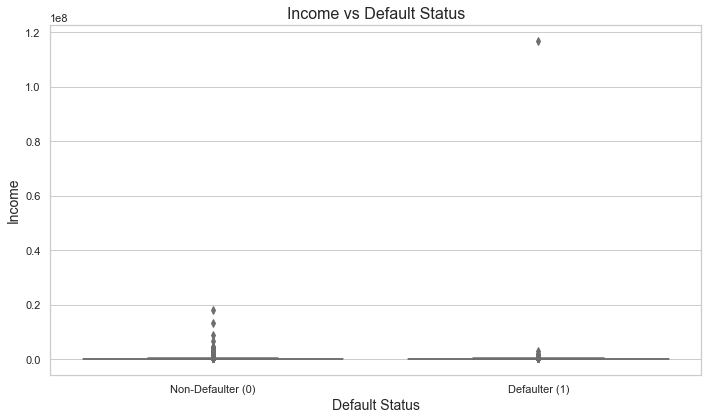

In [14]:
sns.set(style="whitegrid")

# Boxplot for Income vs Default Status
plt.figure(figsize=(10,6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_train, palette=["skyblue", "salmon"])
plt.title('Income vs Default Status', fontsize=16)
plt.xlabel('Default Status', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks([0, 1], ['Non-Defaulter (0)', 'Defaulter (1)'])
plt.tight_layout()
plt.show()

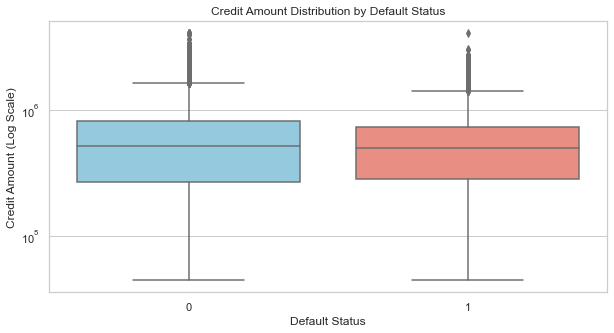

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=application_train, palette=['skyblue', 'salmon'])
plt.yscale('log')
plt.title('Credit Amount Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Credit Amount (Log Scale)')
plt.show()

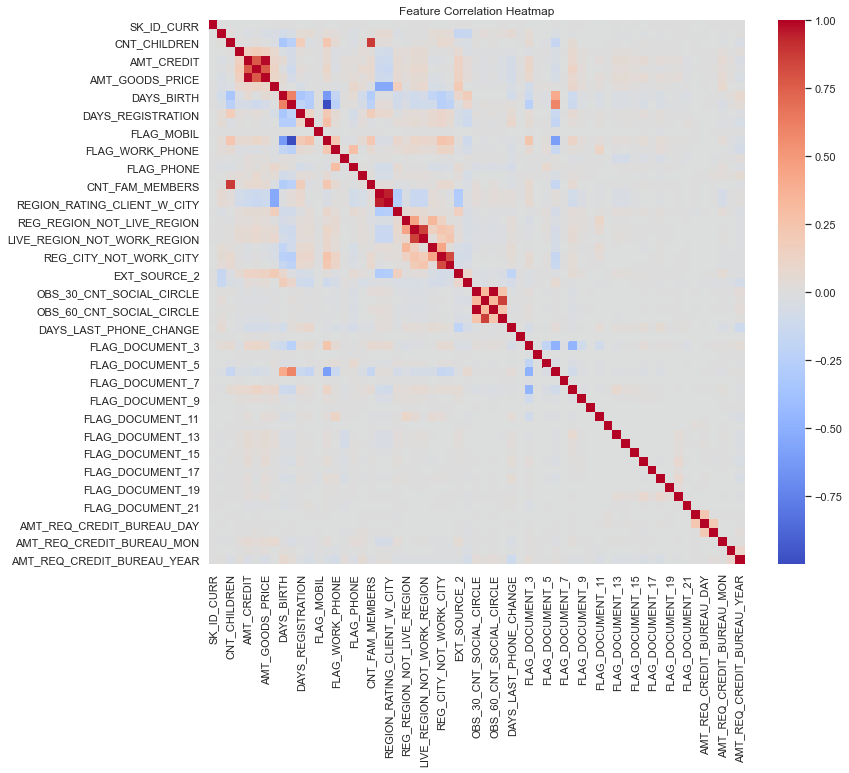

In [16]:
# Find the correlation matrix between categories

plt.figure(figsize=(12,10))
corr_matrix = application_train.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
correlation_matrix = application_train.corr()

# Print correlation matrix
print(correlation_matrix)

                            SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002066  0.001701      0.000107   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001879 -0.001306     -0.001083   
AMT_REQ_CREDIT_BUREAU_MON     0.000328 -0.014794     -0.007983   
AMT_REQ_CREDIT_BUREAU_QRT     0.000809 -0.005833     -0.004913   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004071  0.012161     -0.034874   

                            AMT_INCOME_TOTAL  AMT_CREDIT  ...  \
SK_ID_CURR                         -0.001820   -0.000343  ...   
TARGET                             -0.003982   -0.030369  ...   
CNT_CHILDREN

LinAlgError: singular matrix

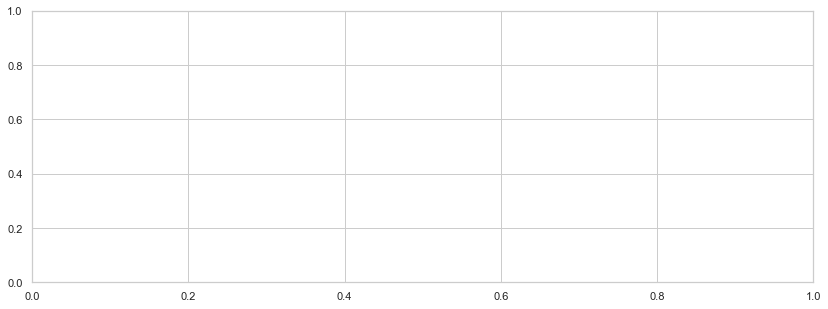

In [18]:
#Show target variable vs. year employed

#application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED']
application_train = application_train[application_train['DAYS_EMPLOYED'] > 0]

plt.figure(figsize=(14,5))
sns.histplot(application_train, x='DAYS_EMPLOYED', hue='TARGET', bins=30, kde=True, palette=['skyblue', 'salmon'])
plt.title('Years Employed Distribution by Default Status')
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.show()

##  Result & Insights

From the above data exploration and visualizations we can see that older borrowers are more likely to repay their loans. We can also see that borrowers that have higher levels of income are more likely to repay their loans.

## Defining Target Variable

Creating a variable X that will store out training data frame. Creating a variable y to store our target variable.

In [19]:
X = application_train.drop(columns=['TARGET', 'SK_ID_CURR'], axis =1)
y = application_train['TARGET']

## Converting Categorical Columns

In [20]:
for col in X.columns:
    col_type = X[col].dtype
    if col_type == 'object':
        X[col] = X[col].astype('category')

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55374 entries, 8 to 307507
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   NAME_CONTRACT_TYPE           55374 non-null  category
 1   CODE_GENDER                  55374 non-null  category
 2   FLAG_OWN_CAR                 55374 non-null  category
 3   FLAG_OWN_REALTY              55374 non-null  category
 4   CNT_CHILDREN                 55374 non-null  int64   
 5   AMT_INCOME_TOTAL             55374 non-null  float64 
 6   AMT_CREDIT                   55374 non-null  float64 
 7   AMT_ANNUITY                  55374 non-null  float64 
 8   AMT_GOODS_PRICE              55374 non-null  float64 
 9   NAME_TYPE_SUITE              55374 non-null  category
 10  NAME_INCOME_TYPE             55374 non-null  category
 11  NAME_EDUCATION_TYPE          55374 non-null  category
 12  NAME_FAMILY_STATUS           55374 non-null  category
 13  

## Split Test & Train Set (80/20)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 42, stratify = y)

In [23]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Reduce the hyperparameter grid size for quicker testing
param_grid = {
    'subsample': [0.9, 1.0],
    'num_leaves': [31, 50],
    'n_estimators': [100],
    'learning_rate': [0.1],
    'colsample_bytree': [0.9]
}

lgbm = lgb.LGBMClassifier()

# Use fewer cross-validation folds to speed up the process
grid_search = GridSearchCV(lgbm, param_grid, cv=3, verbose=3, n_jobs=-1)

# Fit grid search to the data
grid_search.fit(X, y)

# Access the best model from grid search
best_model = grid_search.best_estimator_

# Train the model on the full dataset
best_model.fit(X, y)

# Make predictions
y_pred = best_model.predict(X)

# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Info] Number of positive: 2990, number of negative: 52384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2810
[LightGBM] [Info] Number of data points in the train set: 55374, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.053996 -> initscore=-2.863328
[LightGBM] [Info] Start training from score -2.863328
[LightGBM] [Info] Number of positive: 2990, number of negative: 52384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2810
[LightGBM] [Info] Number of data points in the train 

In [24]:
# One-hot encoding the categorical columns
X = pd.get_dummies(X, drop_first=True)

# Check the transformed data
print(X.head())

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
8              0        112500.000   1019610.0      33826.5         913500.0   
11             0         38419.155    148365.0      10678.5         135000.0   
23             0         83250.000    239850.0      23850.0         225000.0   
38             0         99000.000    247275.0      17338.5         225000.0   
43             0        108000.000    746280.0      42970.5         675000.0   

    ...  WEEKDAY_APPR_PROCESS_START_SATURDAY  \
8   ...                                    0   
11  ...                                    0   
23  ...                                    0   
38  ...                                    0   
43  ...                                    0   

    WEEKDAY_APPR_PROCESS_START_SUNDAY  WEEKDAY_APPR_PROCESS_START_THURSDAY  \
8                                   0                                    0   
11                                  0                                    0

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55374 entries, 8 to 307507
Data columns (total 91 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CNT_CHILDREN                                       55374 non-null  int64  
 1   AMT_INCOME_TOTAL                                   55374 non-null  float64
 2   AMT_CREDIT                                         55374 non-null  float64
 3   AMT_ANNUITY                                        55374 non-null  float64
 4   AMT_GOODS_PRICE                                    55374 non-null  float64
 5   REGION_POPULATION_RELATIVE                         55374 non-null  float64
 6   DAYS_BIRTH                                         55374 non-null  float64
 7   DAYS_EMPLOYED                                      55374 non-null  int64  
 8   DAYS_REGISTRATION                                  55374 non-null  float64
 9   DAYS_

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check the feature importances
importances = model.feature_importances_
print(importances)

[3.74872609e-03 4.88217317e-02 5.35007210e-02 5.90992433e-02
 4.64262581e-02 4.54739845e-02 6.23373648e-02 0.00000000e+00
 6.11913363e-02 6.30357693e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.42980058e-04 8.98922027e-03 3.48222085e-03
 1.07986209e-02 8.01740782e-03 7.84285799e-03 4.02696438e-02
 9.40667558e-04 0.00000000e+00 0.00000000e+00 3.56611679e-03
 0.00000000e+00 0.00000000e+00 7.62322646e-02 7.19964201e-02
 2.09498761e-02 7.91412112e-03 1.98065917e-02 7.20912794e-03
 5.32310633e-02 0.00000000e+00 9.55234345e-03 2.60406117e-08
 1.19364619e-03 9.34120176e-03 4.31271246e-06 6.21381146e-04
 8.42011696e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.81011066e-06 0.00000000e+00 2.16362740e-07 1.71194176e-06
 0.00000000e+00 6.74368729e-06 6.34419322e-06 7.18074871e-08
 0.00000000e+00 7.83091390e-04 2.18157202e-03 3.86415915e-03
 8.65619203e-03 1.13514877e-02 2.93961226e-02 3.27574700e-03
 8.16219655e-03 7.18349198e-03 8.73959047e-03 6.34617718e-03
 1.46145132e-04 6.105453

In [27]:
pd.set_option('display.max_rows', None) 

# Assuming X.columns contains the feature names
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))


                   Feature  Importance
26            EXT_SOURCE_2    0.076232
27            EXT_SOURCE_3    0.071996
9          DAYS_ID_PUBLISH    0.063036
6               DAYS_BIRTH    0.062337
8        DAYS_REGISTRATION    0.061191
3              AMT_ANNUITY    0.059099
2               AMT_CREDIT    0.053501
32  DAYS_LAST_PHONE_CHANGE    0.053231
1         AMT_INCOME_TOTAL    0.048822
4          AMT_GOODS_PRICE    0.046426


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming you already have 'X' (features) and 'y' (target) data

# Step 1: Get feature importances from the trained model
importances = model.feature_importances_

# Step 2: Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Step 3: Sort the features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Select the top 10 features
top_10_features = sorted_features.head(10)['Feature'].values

# Step 5: Subset the data to only include the top 10 features
X_top_10 = X[top_10_features]

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.3, random_state=42)

# Step 7: Train the RandomForest model with the top 10 features
model_top_10 = RandomForestClassifier()
model_top_10.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model_top_10.predict(X_test)

# Step 9: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with top 10 features: {accuracy}')

# Step 10: Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 11: Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy with top 10 features: 0.9454042015289231
Confusion Matrix:
[[15705     6]
 [  901     1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15711
           1       0.14      0.00      0.00       902

    accuracy                           0.95     16613
   macro avg       0.54      0.50      0.49     16613
weighted avg       0.90      0.95      0.92     16613



In [29]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your dataset in X and y
# Example: X, y = your_dataset.drop('target_column', axis=1), your_dataset['target_column']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Set up LightGBM parameters with class weighting
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'class_weight': 'balanced',  # Automatically balances class weights
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 2. Create LightGBM Dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

# 3. Train the model using LightGBM
model = lgb.train(
    params={
        "objective": "binary",
        "metric": "auc",
    },
    train_set = train_data,
    valid_sets=[valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ]
)

# 4. Make predictions on the validation set
y_pred_prob = model.predict(X_valid)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# 5. Evaluate the model using metrics
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_binary))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_binary))

# Accuracy
accuracy = np.mean(y_pred_binary == y_valid)
print(f"\nAccuracy: {accuracy}")

# 6. Optional: Feature importances
importances = model.feature_importance()
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

print("\nFeature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")



LightGBMError: Do not support special JSON characters in feature name.

In [30]:
import re

# Sanitize feature names by removing special characters
X_train.columns = X_train.columns.str.replace(r'\W+', '_', regex=True)  # Replace non-alphanumeric characters with underscores
X_valid.columns = X_valid.columns.str.replace(r'\W+', '_', regex=True)

# 2. Create LightGBM Dataset objects
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

# 3. Train the model using LightGBM with early stopping
model = lgb.train(
    params,
    dtrain,
    valid_sets=[dvalid],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]  # Early stopping after 10 rounds without improvement
)

# 4. Make predictions on the validation set
y_pred_prob = model.predict(X_valid)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# 5. Evaluate the model using metrics
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_binary))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_binary))

# Accuracy
accuracy = np.mean(y_pred_binary == y_valid)
print(f"\nAccuracy: {accuracy}")

# 6. Optional: Feature importances
importances = model.feature_importance()
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

print("\nFeature Importances:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Number of positive: 2394, number of negative: 41905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2820
[LightGBM] [Info] Number of data points in the train set: 44299, number of used features: 68
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054042 -> initscore=-2.862440
[LightGBM] [Info] Start training from score -2.862440
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.0538149
Confusion Matrix:
[[10479     0]
 [  596     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10479
           1       0.00      0.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load your dataset
# Example: data = pd.read_csv("your_data.csv")
# X = data.drop(columns=["target"])
# y = data["target"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling class imbalance (SMOTE for oversampling minority class)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Model instantiation with class_weight handling
model = lgb.LGBMClassifier(scale_pos_weight=round(len(y_train) / y_train.sum()))  # Class imbalance weight

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Retrain model with the best parameters
best_model = lgb.LGBMClassifier(**best_params, scale_pos_weight=round(len(y_train) / y_train.sum()))
best_model.fit(X_train_res, y_train_res)

# Model prediction and evaluation
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred = (y_pred_prob >= 0.3).astype(int)  # Adjusting the threshold

# Evaluation metrics: Precision-Recall curve, ROC AUC, and confusion matrix
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_pr = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"AUC-PR: {auc_pr}")
print(f"Confusion Matrix:\n{cm}")
print(classification_report(y_test, y_pred))

# Cross-Validation with Stratified K-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in cv.split(X_train_res, y_train_res):
    X_train_cv, X_val_cv = X_train_res[train_idx], X_train_res[val_idx]
    y_train_cv, y_val_cv = y_train_res[train_idx], y_train_res[val_idx]
    best_model.fit(X_train_cv, y_train_cv)
    print(f"Validation Score: {best_model.score(X_val_cv, y_val_cv)}")

# Feature Importances (Optional for feature selection)
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

# Optional: Remove least important features and retrain if necessary
# For example, drop the least important features:
# X_train_selected = X_train.drop(columns=[X.columns[indices[-1]]])
# X_test_selected = X_test.drop(columns=[X.columns[indices[-1]]])
# best_model.fit(X_train_selected, y_train_res)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 1560, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py", line 1049, in fit
    self._Booster = train(
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py", line 297, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 3656, in __init__
    train_set.construct()
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2590, in construct
    self._lazy_init(
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 2227, in _lazy_init
    return self.set_feature_name(feature_name)
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 3046, in set_feature_name
    _safe_call(
  File "/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py", line 313, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [32]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming your data is in X_train_res and y_train_res
# Clean the feature names (remove special characters)
X_train_res.columns = X_train_res.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# Set up the LightGBM model
model = lgb.LGBMClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [50, 100]
}

# Set up GridSearchCV with 3-fold cross-validation and parallel processing
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Output the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set (you need to have a test set for this)
# Assuming X_test and y_test are your test data
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 41907, number of negative: 41907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5633
[LightGBM] [Info] Number of data points in the train set: 83814, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 100, 'num_leaves': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10477
           1       0.17      0.01      0.02       598

    accuracy                           0.94     11075
   macro avg       0.56      0.50      0.50     11075
weighted avg       0.90      0.94      

[LightGBM] [Info] Number of positive: 41907, number of negative: 41907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5633
[LightGBM] [Info] Number of data points in the train set: 83814, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10477
           1       0.17      0.01      0.02       598

    accuracy                           0.94     11075
   macro avg       0.56      0.50      0.50     11075
weighted avg       0.90      0.94      0.92     11075

Confusion Matrix:
[[10444    33]
 [  591     7]]
ROC-AUC Score: 0.6591659768826316


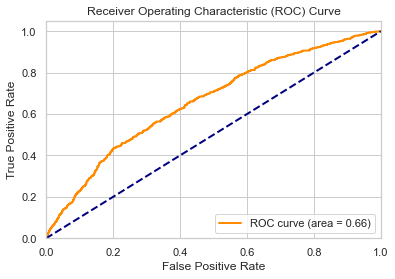

In [33]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming you already have the preprocessed and resampled data (X_train_res, y_train_res)

# Define the best parameters from the GridSearchCV
best_params = {
    'learning_rate': 0.05,
    'max_depth': 20,
    'n_estimators': 100,
    'num_leaves': 50,
    'class_weight': 'balanced'  # Handling class imbalance
}

# Initialize the LightGBM classifier with the best hyperparameters
model = lgb.LGBMClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    num_leaves=best_params['num_leaves'],
    class_weight=best_params['class_weight']  # Adjust class weights
)

# Fit the model to the training data
model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

# You can also plot the ROC curve if needed
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Data Conclusion

The model performs exceptionally well on predicting non-defaulters with a precision of 95%. Although the model was able to predict the non-defaults well it did not perform nearly as well when  predicting the defaulters.

## Conclusion

The correlation matrix reveals that loan amounts, annuities, and income levels are moderately correlated, indicating that higher income generally leads to higher credit and annuity values. Negative correlations between age (DAYS_BIRTH) and loan default (TARGET) suggest that younger borrowers are at higher risk, while employment duration (DAYS_EMPLOYED) also shows a weak negative correlation with default, implying that longer employment history reduces risk. Visualizations further highlight these trends, reinforcing the need for risk-adjusted loan policies that account for borrower demographics and financial stability.